### check iso correction 

In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy
import seaborn as sns


In [2]:
if False:  #full histo fit with voigt + gaus
    f_name = "voigt_gaus_until100.txt"
    number_name = "comb_voigt_gauss_numbers.txt" 
if False:  # full histo fit with gaussians only
    f_name = "comb_gaussian_fitting.txt"
    number_name = "comb_gaussian_fitting_numbers.txt"    
if False:  # partial fit with voigt
    f_name = "after_bug_same_histo_voigt_comb.txt"
    number_name = "comb_voigt_only_numbers.txt"
##this is now with prefit of 12c voigt+gaus, then fitting 11 and 10c with two gaussians, loglikelihood minimizer
##12c is fitted from -150 up to +10
if True:
    f_name = "thursay_ten_loli.txt"
    number_name = "comb_numbers_left_vg_ten.txt"


In [3]:
df_corr_factors = pd.read_csv(f_name,sep='\t',names=["datatype","targettype","RunID","energy","d_reacted_carbon","all_carbon","f_err"])

In [4]:
df_corr_factors["d_reacted_carbon"] = 100*df_corr_factors["d_reacted_carbon"]

['c_1086' 'c_2198' 'c_54' 'empty']


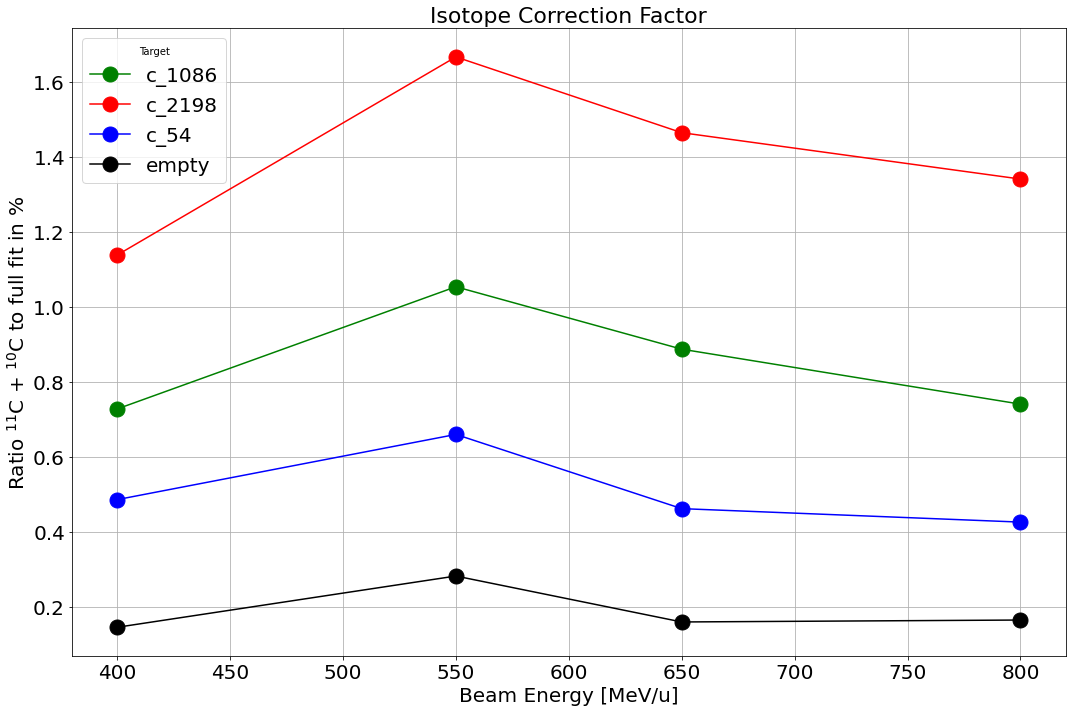

In [5]:


fig, ax = plt.subplots(figsize=(15,10))

targets = df_corr_factors["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))

for target in targets:
    subset = df_corr_factors[df_corr_factors["targettype"] == target]
    ax.plot(
        subset["energy"],
        subset["d_reacted_carbon"],
        label=target,
        color=color_map[target],
        marker="o",
        markersize=15
    )
    #ax.plot(subset["energy"],subset["d_reacted_carbon"])
    
ax.grid(True)
ax.tick_params(labelsize=20)
ax.set_xlabel("Beam Energy [MeV/u]",fontsize=20)
ax.set_ylabel(r'Ratio $^{11}$C + $^{10}$C to full fit in %',fontsize=20)
ax.set_title("Isotope Correction Factor",fontsize=22)
ax.legend(title="Target",fontsize=20)
ax.grid(True)

plt.tight_layout()
plt.show()

#### now look at ratios and full numbers

In [6]:
df_numbers = pd.read_csv(number_name,sep='\t',names=["datatype","targettype","RunID","energy","N_12C","N_11C","N_10C","N_histo"])

#### plot ratio 10C/11C

['c_1086' 'c_2198' 'c_54' 'empty']


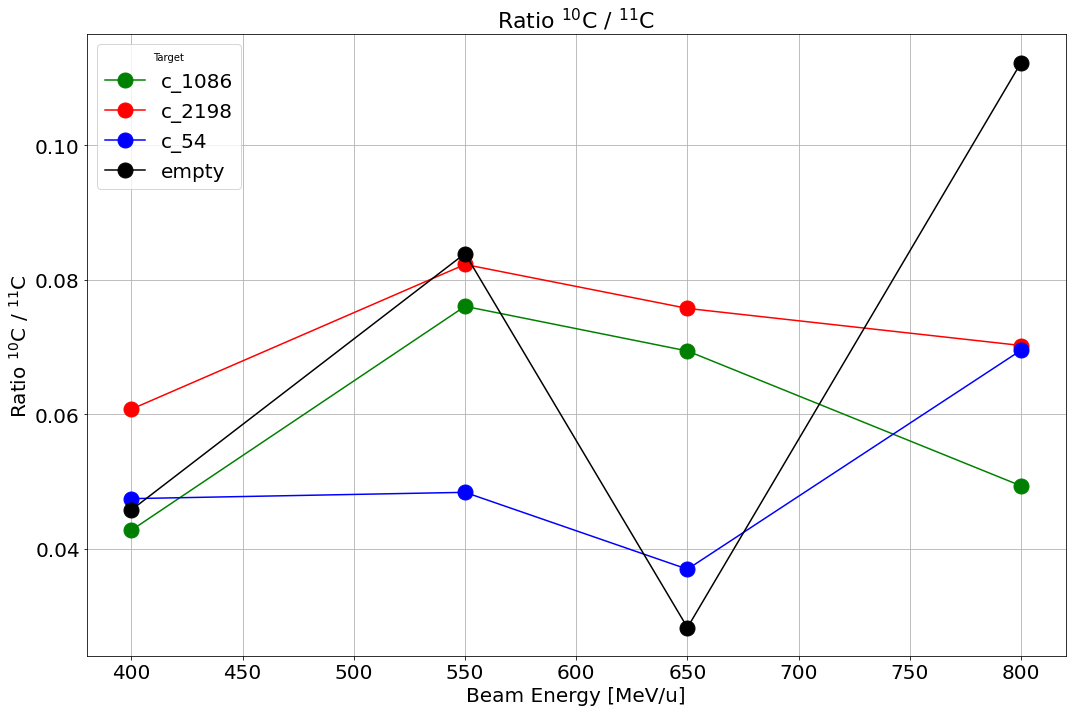

In [7]:
fig, ax = plt.subplots(figsize=(15,10))

targets = df_numbers["targettype"].unique()
df_numbers["ratio_10_11"] = df_numbers["N_10C"]/df_numbers["N_11C"]
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))

for target in targets:
    subset = df_numbers[df_numbers["targettype"] == target]
    ax.plot(
        subset["energy"],
        subset["ratio_10_11"],
        label=target,
        color=color_map[target],
        marker="o",
        markersize=15
    )
    #ax.plot(subset["energy"],subset["d_reacted_carbon"])
    
ax.grid(True)
ax.tick_params(labelsize=20)
ax.set_xlabel("Beam Energy [MeV/u]",fontsize=20)
ax.set_ylabel(r'Ratio $^{10}$C / $^{11}$C',fontsize=20)
ax.set_title(r"Ratio $^{10}$C / $^{11}$C ",fontsize=22)
ax.legend(title="Target",fontsize=20)
ax.grid(True)

plt.tight_layout()
plt.show()

#### plot ratio full fit/N_histo

['c_1086' 'c_2198' 'c_54' 'empty']


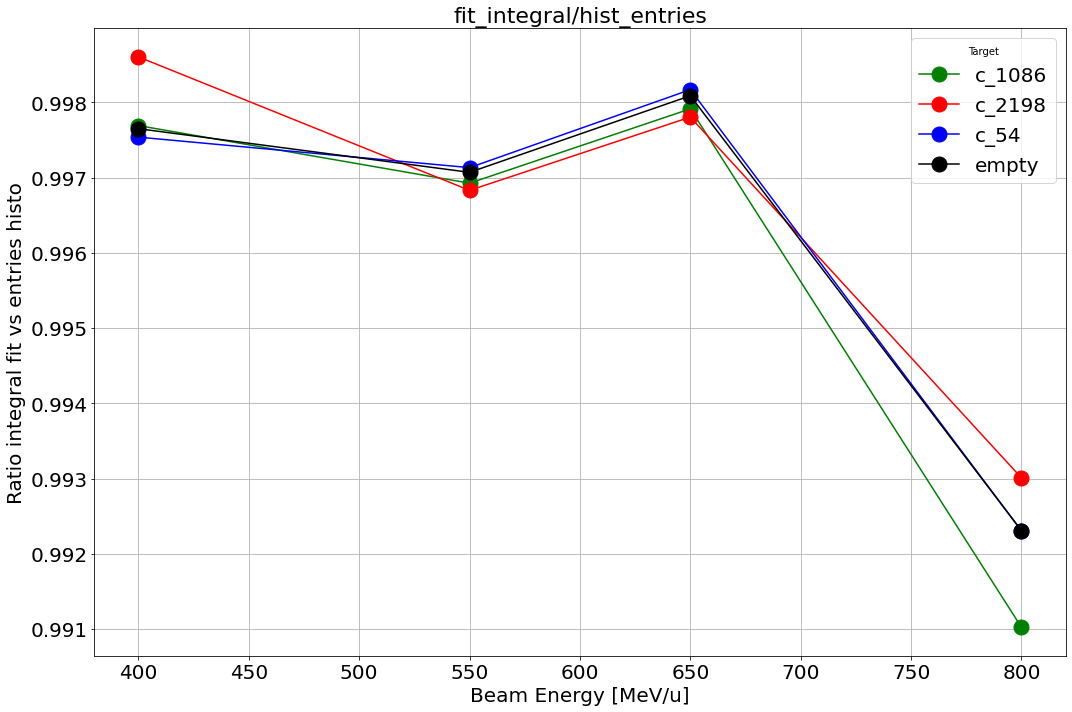

In [8]:
fig, ax = plt.subplots(figsize=(15,10))

targets = df_numbers["targettype"].unique()
df_numbers["fit_histo"] = (df_numbers["N_10C"] + df_numbers["N_11C"] +df_numbers["N_12C"])/df_numbers["N_histo"]
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))

for target in targets:
    subset = df_numbers[df_numbers["targettype"] == target]
    ax.plot(
        subset["energy"],
        subset["fit_histo"],
        label=target,
        color=color_map[target],
        marker="o",
        markersize=15
    )
    #ax.plot(subset["energy"],subset["d_reacted_carbon"])
    
ax.grid(True)
ax.tick_params(labelsize=20)
ax.set_xlabel("Beam Energy [MeV/u]",fontsize=20)
ax.set_ylabel('Ratio integral fit vs entries histo',fontsize=20)
ax.set_title("fit_integral/hist_entries",fontsize=22)
ax.legend(title="Target",fontsize=20)
ax.grid(True)

plt.tight_layout()
plt.show()

### Overview of numbers

In [9]:
df_numbers

,datatype,targettype,RunID,energy,N_12C,N_11C,N_10C,N_histo,ratio_10_11,fit_histo
0,exp,c_1086,0181_0001,400,365436.0,2570.950,109.9490,368969,0.042766,0.997691
1,exp,c_1086,0101_0001,550,273299.0,2705.340,205.7740,277062,0.076062,0.996925
2,exp,c_1086,0127_0001,650,404941.0,3391.090,235.4250,409422,0.069425,0.997913
3,exp,c_1086,0168_0001,800,90235.9,642.108,31.6960,91733,0.049362,0.991025
4,exp,c_2198,0183_0001,400,381412.0,4140.640,251.6150,386344,0.060767,0.998603
5,exp,c_2198,0103_0001,550,267428.0,4187.620,344.6010,272825,0.082290,0.996830
6,exp,c_2198,0130_0001,650,396549.0,5479.060,415.0560,403329,0.075753,0.997804
7,exp,c_2198,0170_0001,800,114969.0,1460.160,102.5570,117352,0.070237,0.993010
8,exp,c_54,0179_0001,400,348093.0,1625.210,77.1426,350659,0.047466,0.997537
9,exp,c_54,0099_0001,550,293386.0,1860.450,90.0539,296186,0.048404,0.997132


In [10]:
subset_df_numbers = df_numbers[["targettype","energy","N_12C","N_11C","N_10C","N_histo"]]
subset_df_numbers.style.applymap(lambda _: 'background-color: whitesmoke', subset=["targettype"]) \
               .applymap(lambda _: 'background-color: whitesmoke', subset=["energy"]) \
               .applymap(lambda _: 'background-color: lightblue', subset=["N_12C"])\
               .applymap(lambda _: 'background-color: lightgreen', subset=["N_11C"])\
               .applymap(lambda _: 'background-color: salmon', subset=["N_10C"])\
               .applymap(lambda _: 'background-color: lightpink', subset=["N_histo"])\
               .format({
                   "N_12C":"{:.1f}",
                   "N_11C":"{:.1f}",
                   "N_10C": "{:.1f}",
               })\
               .set_properties(**{'font-size': '16pt'})\
               .hide_index()
#subset_df_numbers.style.set_properties(**{'font-size': '16pt'})

targettype,energy,N_12C,N_11C,N_10C,N_histo
c_1086,400,365436.0,2570.9,109.9,368969
c_1086,550,273299.0,2705.3,205.8,277062
c_1086,650,404941.0,3391.1,235.4,409422
c_1086,800,90235.9,642.1,31.7,91733
c_2198,400,381412.0,4140.6,251.6,386344
c_2198,550,267428.0,4187.6,344.6,272825
c_2198,650,396549.0,5479.1,415.1,403329
c_2198,800,114969.0,1460.2,102.6,117352
c_54,400,348093.0,1625.2,77.1,350659
c_54,550,293386.0,1860.5,90.1,296186
